In [32]:
import warnings
warnings.filterwarnings('ignore')


In [33]:
import pandas as pd

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Preview the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
df.shape  # shows (rows, columns)

df.info()  # shows types of data

df.describe()  # gives summary stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [35]:
# Check for missing values
df.isnull().sum()

# Check data types
df.dtypes

# Look at unique values for 'Churn'
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869


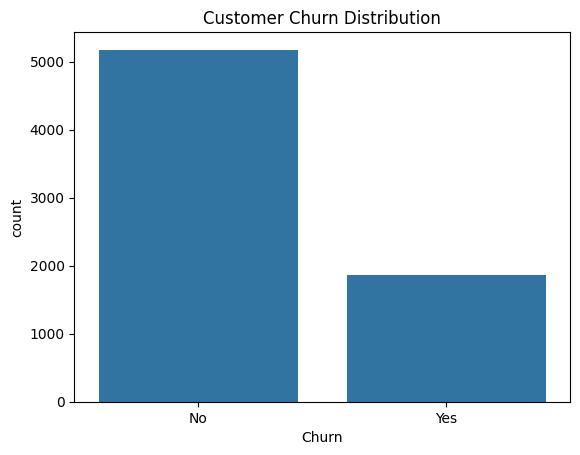

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn count plot
sns.countplot(x='Churn', data=df)
plt.title('Customer Churn Distribution')
plt.show()


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df_encoded = df.copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Split
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Score
print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.8204400283889283


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and check accuracy
y_pred = model.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7360499787022575


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Create the model
dt_model = DecisionTreeClassifier(random_state=42)

# Step 2: Train the model
dt_model.fit(X_train, y_train)

# Step 3: Make predictions
dt_preds = dt_model.predict(X_test)

# Step 4: Evaluate
dt_accuracy = accuracy_score(y_test, dt_preds)
print("Decision Tree Accuracy:", round(dt_accuracy * 100, 2), "%")

# Optional: See confusion matrix and report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, dt_preds))
print("\nClassification Report:\n", classification_report(y_test, dt_preds))


Decision Tree Accuracy: 71.89 %

Confusion Matrix:
 [[834 202]
 [194 179]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1036
           1       0.47      0.48      0.47       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Create the model
rf_model = RandomForestClassifier(random_state=42)

# Step 2: Train the model
rf_model.fit(X_train, y_train)

# Step 3: Make predictions
rf_preds = rf_model.predict(X_test)

# Step 4: Evaluate
rf_accuracy = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", round(rf_accuracy * 100, 2), "%")

# Optional: See confusion matrix and report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("\nClassification Report:\n", classification_report(y_test, rf_preds))


Random Forest Accuracy: 79.7 %

Confusion Matrix:
 [[943  93]
 [193 180]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



In [41]:
# 📦 Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 📁 Step 2: Load Dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 🧹 Step 3: Preprocess Data
df.drop(['customerID'], axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# 🎯 Step 4: Encode Categorical Columns
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# 📊 Step 5: Train-Test Split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌳 Step 6: Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 🔍 Step 7: Predict
dt_preds = dt_model.predict(X_test)

# 🧮 Step 8: Evaluate
accuracy = accuracy_score(y_test, dt_preds)
print("✅ Decision Tree Accuracy:", round(accuracy * 100, 2), "%")
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))
print("\n📋 Classification Report:\n", classification_report(y_test, dt_preds))


✅ Decision Tree Accuracy: 72.49 %

📊 Confusion Matrix:
 [[826 207]
 [180 194]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.52      0.50       374

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.73      0.72      0.73      1407



✅ Random Forest Accuracy: 79.25 %

📊 Confusion Matrix:
 [[932 101]
 [191 183]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



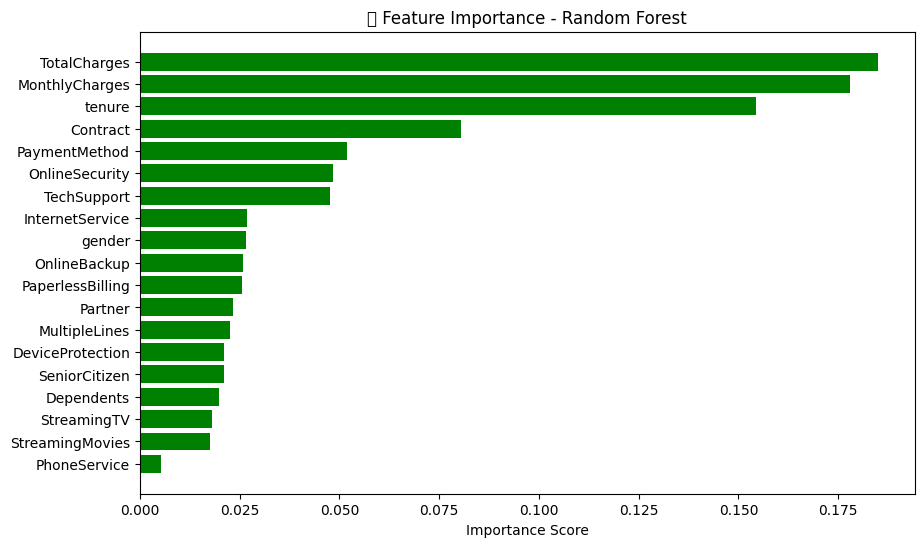

In [42]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 📁 Step 2: Load Dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 🧹 Step 3: Preprocess Data
df.drop(['customerID'], axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# 🎯 Step 4: Encode Categorical Columns
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# 📊 Step 5: Train-Test Split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Step 6: Train Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 🔍 Step 7: Predict
rf_preds = rf_model.predict(X_test)

# 🧮 Step 8: Evaluate
accuracy = accuracy_score(y_test, rf_preds)
print("✅ Random Forest Accuracy:", round(accuracy * 100, 2), "%")
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("\n📋 Classification Report:\n", classification_report(y_test, rf_preds))

# 🔎 Step 9: Feature Importance Plot
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('📈 Feature Importance - Random Forest')
plt.barh(range(len(indices)), importances[indices], color='green')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Importance Score")
plt.show()


<Axes: xlabel='Churn', ylabel='count'>

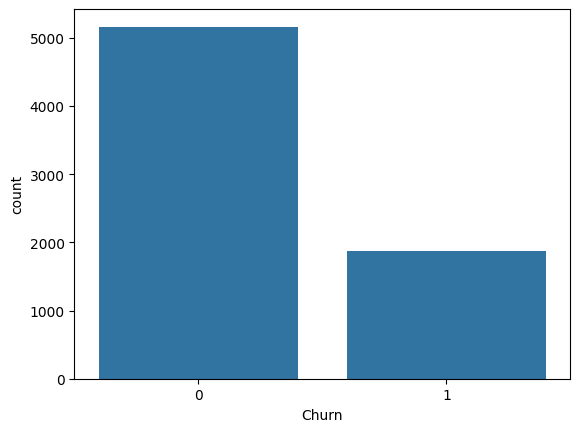

In [43]:
#Churn Distribution
import seaborn as sns
sns.countplot(data=df, x='Churn')


<Axes: >

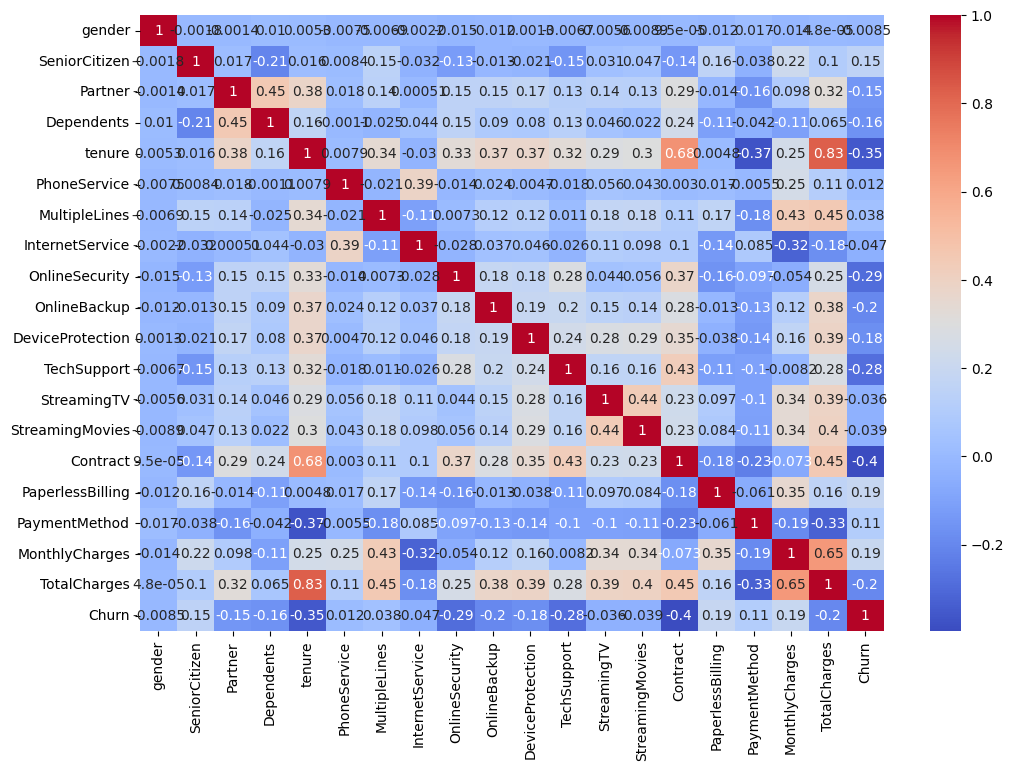

In [44]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


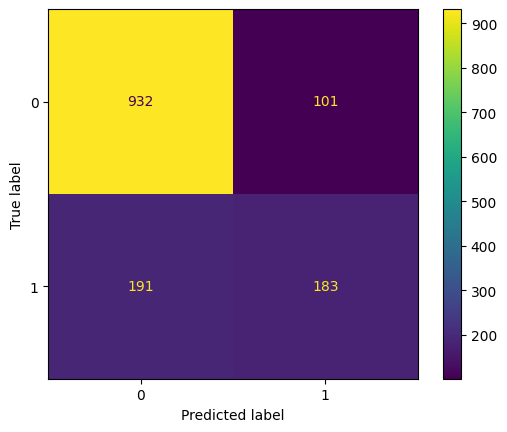

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Random Forest
y_pred_rf = rf_model.predict(X_test)
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot()


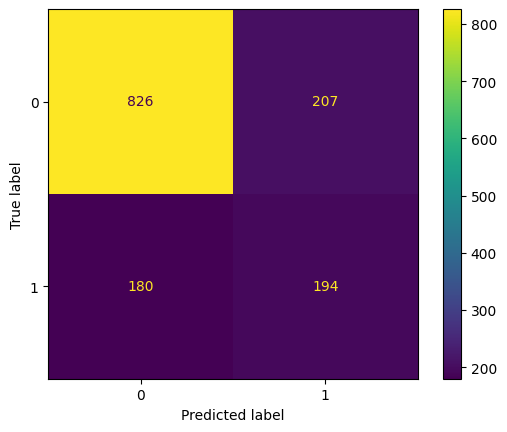

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Decision Tree
y_pred_dt = dt_model.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_model.classes_)
disp_dt.plot()


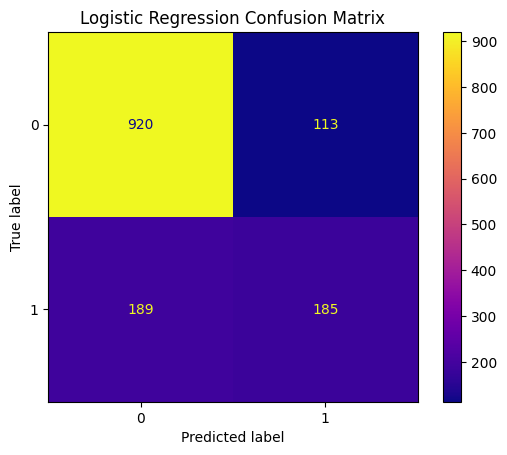

✅ Accuracy: 0.79
🎯 Precision: 0.62
📢 Recall: 0.49
📊 F1 Score: 0.55


In [47]:
# Step 1: Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Step 2: Initialize and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)  # increase max_iter to avoid convergence warning
lr_model.fit(X_train, y_train)

# Step 3: Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Step 4: Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_model.classes_)
disp_lr.plot(cmap='plasma', values_format='d')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Step 5: Print Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print(f"✅ Accuracy: {accuracy:.2f}")
print(f"🎯 Precision: {precision:.2f}")
print(f"📢 Recall: {recall:.2f}")
print(f"📊 F1 Score: {f1:.2f}")


In [48]:
from sklearn.metrics import classification_report

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("Decision Tree:")
print(classification_report(y_test, y_pred_dt))

print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.52      0.50       374

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.73      0.72      0.73      1407

Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Create the base model
rf = RandomForestClassifier(random_state=42)

# Setup the GridSearch
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,        # 5-fold cross-validation
                           scoring='f1_macro',  # Balance both classes
                           n_jobs=-1,
                           verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:\n", grid_search.best_params_)

# Use the best estimator
best_rf = grid_search.best_estimator_

# Predict
y_pred = best_rf.predict(X_test)

# Classification report again
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Hyperparameters:
 {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.65      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Apply SMOTE only to training set
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())

# Train with best parameters
rf_smote = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    random_state=42
)

rf_smote.fit(X_train_sm, y_train_sm)

# Predict and evaluate
y_pred_smote = rf_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))


Before SMOTE: Churn
0    4130
1    1495
Name: count, dtype: int64
After SMOTE: Churn
1    4130
0    4130
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1033
           1       0.54      0.65      0.59       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.78      0.76      0.76      1407



In [51]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Apply SMOTE to balance classes in training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Show class distribution before and after
print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_sm.value_counts())

# Train Random Forest with best parameters on SMOTE data
rf_smote = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    random_state=42
)

rf_smote.fit(X_train_sm, y_train_sm)

# Predict on original (imbalanced) test data
y_pred_smote = rf_smote.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred_smote))


Before SMOTE:
 Churn
0    4130
1    1495
Name: count, dtype: int64
After SMOTE:
 Churn
1    4130
0    4130
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1033
           1       0.54      0.65      0.59       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.78      0.76      0.76      1407



In [52]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_smote, 'final_random_forest_smote_model.pkl')

print(" Final Random Forest model saved as 'final_random_forest_smote_model.pkl'")


 Final Random Forest model saved as 'final_random_forest_smote_model.pkl'


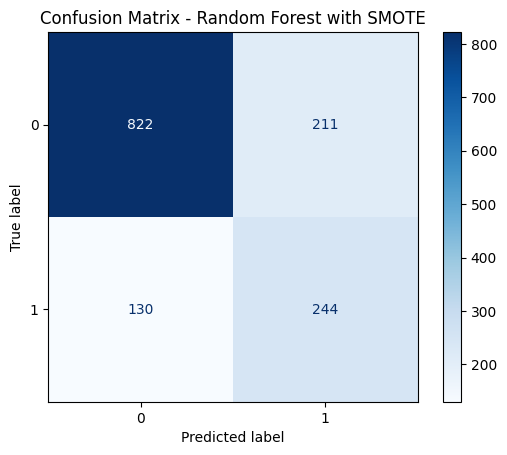

📊 Final Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1033
           1       0.54      0.65      0.59       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.78      0.76      0.76      1407



In [53]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict using the final model
y_pred = rf_smote.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_smote.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest with SMOTE")
plt.show()

print("📊 Final Classification Report:")
print(classification_report(y_test, y_pred, digits=2))


In [54]:
# Load model
model = joblib.load("final_random_forest_smote_model.pkl")

# Predict
predictions = model.predict(X_test)


In [55]:
model_features = X_train.columns.tolist()
joblib.dump(model_features, 'model_features.pkl')


['model_features.pkl']

In [56]:
joblib.dump(X.columns.tolist(), "model_features.pkl")


['model_features.pkl']

In [57]:
import pandas as pd
import joblib

# Load input data
input_df = pd.read_csv("Telco-Customer-Churn-Input.csv")

# Drop any non-feature columns if needed (like 'customerID' if present)
if 'customerID' in input_df.columns:
    input_df = input_df.drop(columns=['customerID'])

# Load the model
model = joblib.load("final_random_forest_smote_model.pkl")

# Load feature columns used during model training
model_features = joblib.load("model_features.pkl")  # You must have saved this earlier

# One-hot encode the input data
input_df_encoded = pd.get_dummies(input_df)

# Add any missing columns (from training) with 0 values
for col in model_features:
    if col not in input_df_encoded.columns:
        input_df_encoded[col] = 0

# Reorder the columns to match training
input_df_encoded = input_df_encoded[model_features]

# Now prediction will work
predictions = model.predict(input_df_encoded)

# Add predictions back to input
input_df['Churn_Prediction'] = predictions

# Save results
input_df.to_csv("Churn_Predictions.csv", index=False)
print("✅ Prediction saved to 'Churn_Predictions.csv'")


✅ Prediction saved to 'Churn_Predictions.csv'
